# Coffee Shop Sales Analysis

**Analysis Overview:** This notebook provides a comprehensive exploratory data analysis (EDA) of coffee shop sales data from March to July 2024. The analysis explores transaction patterns, popular beverages, temporal trends, and revenue insights.

**Dataset:** Coffee shop transaction records including date, time, payment type, amount, and product details.


##  Setup and Data Loading

###  Import Required Libraries

In [38]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and time handling
import datetime as dt

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

###  Load Dataset

In [39]:
# Load the coffee sales data
data = pd.read_csv('index.csv')

print(f"Total transactions: {len(data):,}")

Total transactions: 1,133


##  Initial Data Exploration

###  Preview Dataset Structure

In [40]:
# Display first few rows
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [41]:
# Dataset information
print("Dataset Information:")
print("=" * 50)
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


###  Data Quality Assessment

In [67]:
# Check for missing values
print("Missing Values Summary:")
print("=" * 50)
missing_summary = data.isnull().sum()
missing_pct = (missing_summary / len(data) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing_summary,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])

# Note about card column
print("\n Note: Missing 'card' values indicate cash transactions.")

Missing Values Summary:
      Missing Count  Percentage
card             89        7.86

 Note: Missing 'card' values indicate cash transactions.


In [66]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Duplicate Records: {duplicates}")

if duplicates > 0:
    print(f"  Found {duplicates} duplicate transactions.")
else:
    print("No duplicate records found.")

Duplicate Records: 0
No duplicate records found.


##  Statistical Analysis

###  Descriptive Statistics

In [44]:
# Numerical variable statistics
print("Descriptive Statistics:")
print("=" * 50)
data.describe().T

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
money,1133.0,33.105808,5.035366,18.12,28.9,32.82,37.72,40.0


In [45]:
# Categorical variable statistics
print("Categorical Variable Summary:")
print("=" * 50)
data[['cash_type', 'card', 'coffee_name']].describe().T

Categorical Variable Summary:


,count,unique,top,freq
cash_type,1133,2,card,1044
card,1044,446,ANON-0000-0000-0012,88
coffee_name,1133,8,Americano with Milk,268


###  Payment Method Analysis

In [46]:
# Verify cash transactions
cash_transactions = data[data['card'].isnull()]['cash_type'].value_counts()
print("Cash Transaction Verification:")
print(cash_transactions)
print("\n All transactions with missing card info are confirmed as 'cash' payments.")

Cash Transaction Verification:
cash_type
cash    89
Name: count, dtype: int64

 All transactions with missing card info are confirmed as 'cash' payments.


In [47]:
# Payment method distribution
payment_dist = data['cash_type'].value_counts(normalize=True).round(4) * 100

print("Payment Method Distribution:")
print("=" * 50)
for method, pct in payment_dist.items():
    print(f"{method.capitalize()}: {pct:.2f}%")

print("\n Key Insight: Card payments dominate, accounting for over 92% of all transactions.")

Payment Method Distribution:
Card: 92.14%
Cash: 7.86%

 Key Insight: Card payments dominate, accounting for over 92% of all transactions.


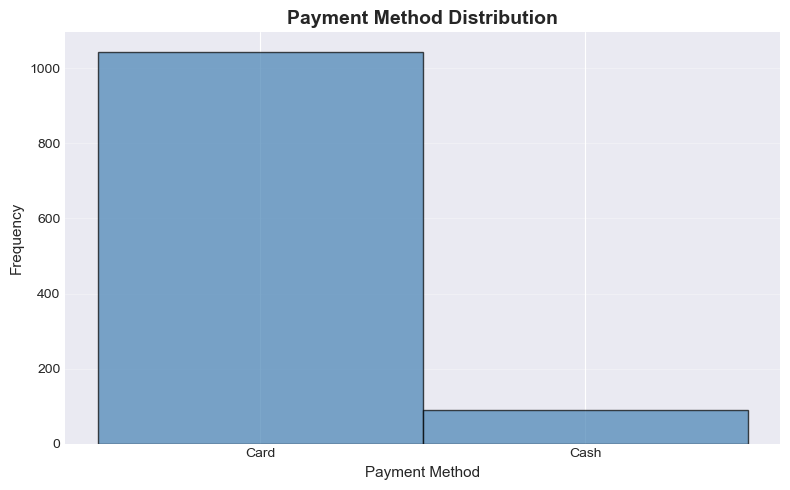

In [48]:
# Visualize payment distribution
plt.figure(figsize=(8, 5))
data['cash_type'].hist(bins=2, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Payment Method Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Payment Method', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.xticks([0.25, 0.75], ['Card', 'Cash'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Product Popularity Analysis

In [49]:
# Coffee product distribution
coffee_dist = pd.DataFrame(
    data['coffee_name'].value_counts(normalize=True).sort_values(ascending=False).round(4) * 100
).rename(columns={'coffee_name': 'Percentage'})

coffee_dist.index.name = 'Coffee Type'
print("Coffee Product Distribution (%)")
print("=" * 50)
print(coffee_dist)

top_product = coffee_dist.index[0]
print(f"\n Top Seller: {top_product} ({coffee_dist.iloc[0, 0]:.2f}%)")

Coffee Product Distribution (%)
                     proportion
Coffee Type                    
Americano with Milk       23.65
Latte                     21.45
Cappuccino                17.30
Americano                 14.92
Cortado                    8.74
Hot Chocolate              6.53
Espresso                   4.32
Cocoa                      3.09

 Top Seller: Americano with Milk (23.65%)


##  Data Preprocessing

###  Date and Time Feature Engineering

In [50]:
# Convert to datetime format
data['date'] = pd.to_datetime(data['date'])
data['datetime'] = pd.to_datetime(data['datetime'])

# Extract temporal features
data['month'] = data['date'].dt.strftime('%Y-%m')
data['day'] = data['date'].dt.strftime('%w')  # Day of week (0=Sunday)
data['hour'] = data['datetime'].dt.strftime('%H')  # Hour of day

print(" Temporal features extracted successfully!")
print(f"\nDataset covers: {data['date'].min().strftime('%B %d, %Y')} to {data['date'].max().strftime('%B %d, %Y')}")
print(f"Total duration: {(data['date'].max() - data['date'].min()).days} days")

 Temporal features extracted successfully!

Dataset covers: March 01, 2024 to July 31, 2024
Total duration: 152 days


In [51]:
# Verify processed data
print("Updated Dataset Structure:")
print("=" * 50)
data.info()

Updated Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   hour         1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 79.8+ KB


In [52]:
# Preview processed data
data.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03,5,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03,5,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03,5,13


##  Exploratory Data Analysis (EDA)

###  Revenue Analysis by Product

In [53]:
# Calculate total revenue by coffee type
revenue_data = (
    data.groupby('coffee_name')['money']
    .sum()
    .reset_index()
    .sort_values(by='money', ascending=False)
    .rename(columns={'money': 'Total Revenue'})
)

print("Revenue by Coffee Type:")
print("=" * 50)
print(revenue_data.to_string(index=False))

top_revenue = revenue_data.iloc[0]
print(f"\n Highest Revenue: {top_revenue['coffee_name']} (${top_revenue['Total Revenue']:.2f})")

Revenue by Coffee Type:
        coffee_name  Total Revenue
              Latte        9009.14
Americano with Milk        8601.94
         Cappuccino        7333.14
          Americano        4644.54
      Hot Chocolate        2778.48
            Cortado        2745.08
              Cocoa        1295.94
           Espresso        1100.62

 Highest Revenue: Latte ($9009.14)


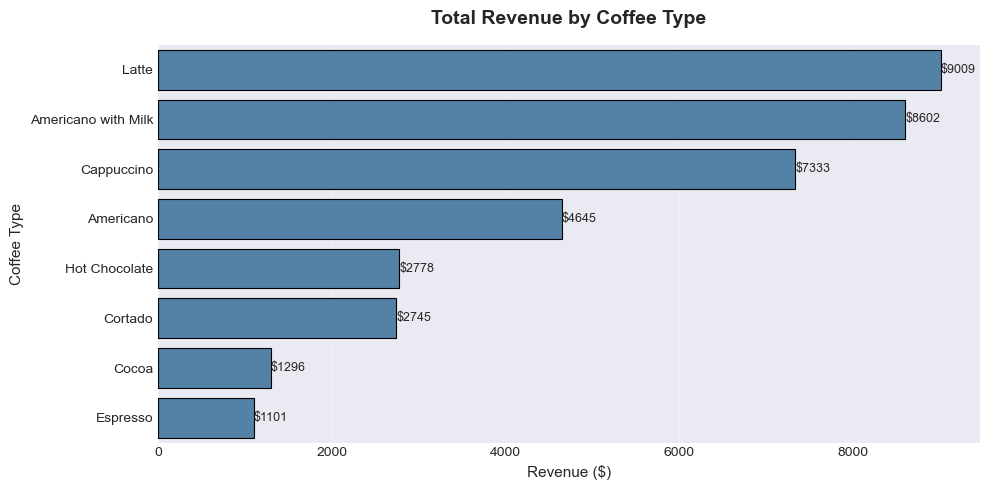

In [54]:
# Visualize revenue by product
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=revenue_data,
    x='Total Revenue',
    y='coffee_name',
    color='steelblue',
    edgecolor='black',
    linewidth=0.8
)
ax.bar_label(ax.containers[0], fontsize=9, fmt='$%.0f')
plt.title('Total Revenue by Coffee Type', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Revenue ($)', fontsize=11)
plt.ylabel('Coffee Type', fontsize=11)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

###  Monthly Sales Trends

In [55]:
# Aggregate monthly sales by coffee type
monthly_sales = (
    data.groupby(['coffee_name', 'month'])['date']
    .count()
    .reset_index()
    .rename(columns={'date': 'count'})
    .pivot(index='month', columns='coffee_name', values='count')
    .reset_index()
)

print("Monthly Sales by Coffee Type:")
print("=" * 80)
print(monthly_sales.to_string(index=False))

Monthly Sales by Coffee Type:
  month  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  Espresso  Hot Chocolate  Latte
2024-03         36                   34          20      6       30        10             22     48
2024-04         35                   42          43      6       19         7             13     31
2024-05         48                   58          55      9       17         8             14     58
2024-06         14                   69          46      5       19        10             14     50
2024-07         36                   65          32      9       14        14             11     56


In [56]:
# Monthly statistics
monthly_stats = monthly_sales.describe().T.loc[:, ['min', 'max']]
print("\nMonthly Sales Statistics (Min & Max):")
print("=" * 50)
print(monthly_stats)


Monthly Sales Statistics (Min & Max):
                      min   max
coffee_name                    
Americano            14.0  48.0
Americano with Milk  34.0  69.0
Cappuccino           20.0  55.0
Cocoa                 5.0   9.0
Cortado              14.0  30.0
Espresso              7.0  14.0
Hot Chocolate        11.0  22.0
Latte                31.0  58.0


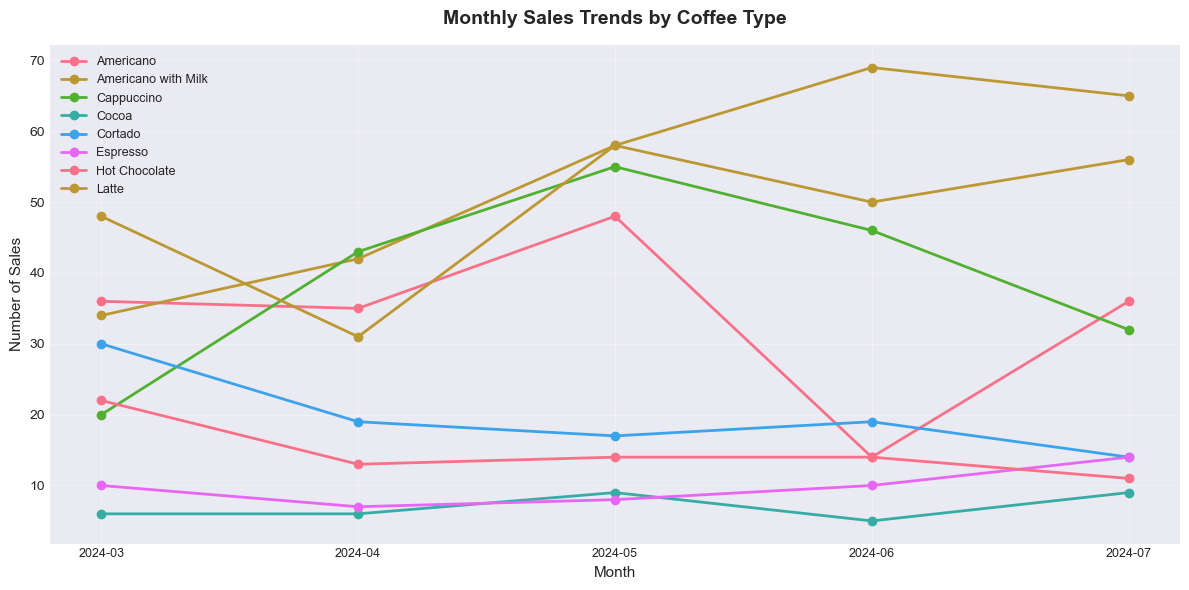

In [57]:
# Visualize monthly trends
plt.figure(figsize=(12, 6))
for col in monthly_sales.columns[1:]:
    plt.plot(monthly_sales['month'], monthly_sales[col], marker='o', label=col, linewidth=2)

plt.title('Monthly Sales Trends by Coffee Type', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Month', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11)
plt.legend(loc='upper left', fontsize=9, framealpha=0.9)
plt.xticks(range(len(monthly_sales['month'])), monthly_sales['month'], rotation=0, size=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

###  Day of Week Analysis

In [58]:
# Aggregate sales by day of week
weekday_sales = (
    data.groupby('day')['date']
    .count()
    .reset_index()
    .rename(columns={'date': 'count'})
)

# Add day names for clarity
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_sales['day_name'] = weekday_sales['day'].astype(int).map(lambda x: day_names[x])

print("Sales by Day of Week:")
print("=" * 50)
print(weekday_sales[['day_name', 'count']].to_string(index=False))

busiest_day = weekday_sales.loc[weekday_sales['count'].idxmax()]
print(f"\n Busiest Day: {busiest_day['day_name']} ({busiest_day['count']} transactions)")

Sales by Day of Week:
 day_name  count
   Sunday    151
   Monday    151
  Tuesday    185
Wednesday    165
 Thursday    164
   Friday    163
 Saturday    154

 Busiest Day: Tuesday (185 transactions)


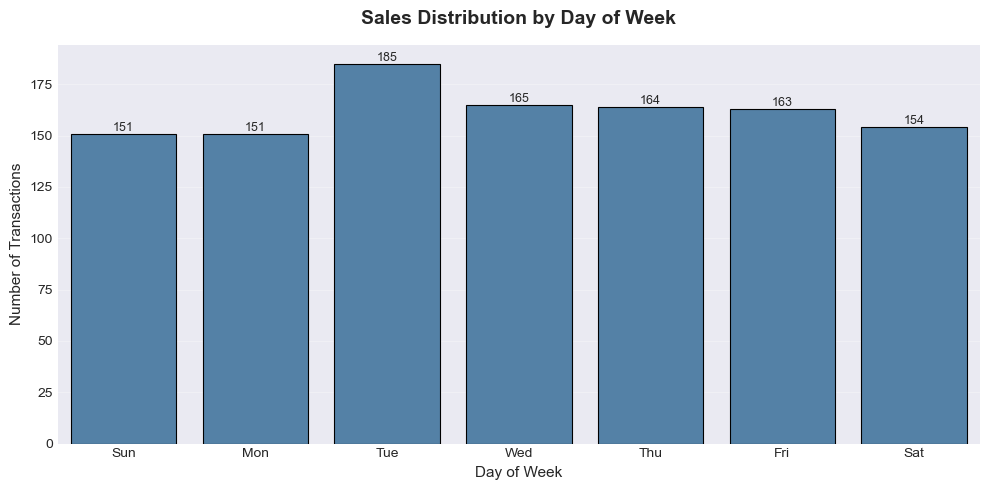

In [59]:
# Visualize day of week sales
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=weekday_sales,
    x='day',
    y='count',
    color='steelblue',
    edgecolor='black',
    linewidth=0.8
)
ax.bar_label(ax.containers[0], fontsize=9)
plt.title('Sales Distribution by Day of Week', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Day of Week', fontsize=11)
plt.ylabel('Number of Transactions', fontsize=11)
plt.xticks(range(len(weekday_sales)), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

###  Daily Sales Patterns

In [60]:
# Aggregate daily sales by coffee type
daily_sales = (
    data.groupby(['coffee_name', 'date'])['datetime']
    .count()
    .reset_index()
    .rename(columns={'datetime': 'count'})
    .pivot(index='date', columns='coffee_name', values='count')
    .fillna(0)
    .reset_index()
)

print(f"Daily sales data aggregated for {len(daily_sales)} days.")
print("\nFirst 5 days:")
print(daily_sales.head().to_string(index=False))

Daily sales data aggregated for 150 days.

First 5 days:
      date  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  Espresso  Hot Chocolate  Latte
2024-03-01        1.0                  4.0         0.0    1.0      0.0       0.0            3.0    2.0
2024-03-02        3.0                  3.0         0.0    0.0      0.0       0.0            0.0    1.0
2024-03-03        1.0                  2.0         0.0    1.0      2.0       0.0            2.0    2.0
2024-03-04        0.0                  1.0         0.0    0.0      0.0       1.0            0.0    2.0
2024-03-05        0.0                  0.0         0.0    1.0      1.0       0.0            4.0    3.0


In [61]:
# Daily statistics
daily_stats = daily_sales.iloc[:, 1:].describe().T.loc[:, ['min', 'max']]
print("Daily Sales Statistics (Min & Max per Coffee Type):")
print("=" * 50)
print(daily_stats)

Daily Sales Statistics (Min & Max per Coffee Type):
                     min   max
coffee_name                   
Americano            0.0   5.0
Americano with Milk  0.0  12.0
Cappuccino           0.0   9.0
Cocoa                0.0   2.0
Cortado              0.0   4.0
Espresso             0.0   4.0
Hot Chocolate        0.0   4.0
Latte                0.0   7.0


###  Hourly Sales Patterns

In [62]:
# Aggregate hourly sales
hourly_sales = (
    data.groupby('hour')['date']
    .count()
    .reset_index()
    .rename(columns={'date': 'count'})
)

print("Sales by Hour of Day:")
print("=" * 50)
print(hourly_sales.to_string(index=False))

peak_hour = hourly_sales.loc[hourly_sales['count'].idxmax()]
print(f"\n Peak Hour: {peak_hour['hour']}:00 ({peak_hour['count']} transactions)")

Sales by Hour of Day:
hour  count
  07     13
  08     44
  09     50
  10    133
  11    103
  12     87
  13     78
  14     76
  15     65
  16     77
  17     77
  18     75
  19     96
  20     54
  21     70
  22     35

 Peak Hour: 10:00 (133 transactions)


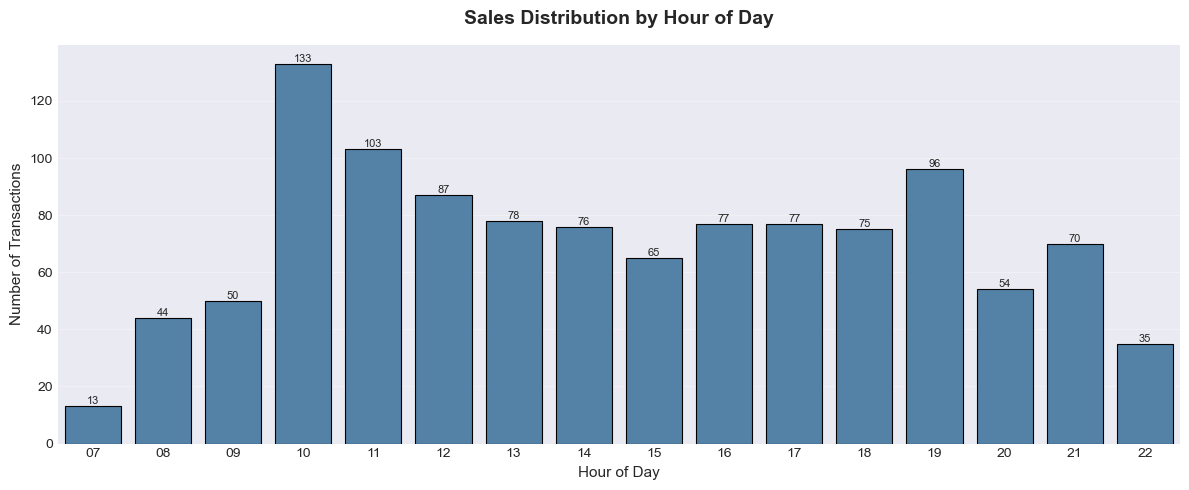

In [63]:
# Visualize hourly sales
plt.figure(figsize=(12, 5))
ax = sns.barplot(
    data=hourly_sales,
    x='hour',
    y='count',
    color='steelblue',
    edgecolor='black',
    linewidth=0.8
)
ax.bar_label(ax.containers[0], fontsize=8)
plt.title('Sales Distribution by Hour of Day', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Hour of Day', fontsize=11)
plt.ylabel('Number of Transactions', fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

###  Hourly Sales by Coffee Type

In [64]:
# Aggregate hourly sales by coffee type
hourly_sales_by_coffee = (
    data.groupby(['hour', 'coffee_name'])['date']
    .count()
    .reset_index()
    .rename(columns={'date': 'count'})
    .pivot(index='hour', columns='coffee_name', values='count')
    .fillna(0)
    .reset_index()
)

print("Hourly Sales by Coffee Type:")
print("=" * 80)
print(hourly_sales_by_coffee.to_string(index=False))

Hourly Sales by Coffee Type:
hour  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  Espresso  Hot Chocolate  Latte
  07        5.0                  4.0         1.0    0.0      1.0       0.0            0.0    2.0
  08       10.0                  7.0         8.0    1.0      6.0       0.0            0.0   12.0
  09        8.0                 16.0         6.0    1.0      5.0       3.0            0.0   11.0
  10       20.0                 31.0        10.0    4.0      8.0       2.0            7.0   51.0
  11       21.0                 25.0        16.0    1.0     13.0       6.0            8.0   13.0
  12       14.0                 26.0        15.0    3.0      7.0       6.0            3.0   13.0
  13       18.0                 18.0        10.0    2.0     12.0       3.0            4.0   11.0
  14       15.0                 18.0        13.0    4.0      6.0       5.0            2.0   13.0
  15       14.0                 15.0         8.0    0.0      3.0       4.0            6.0   15.0
 

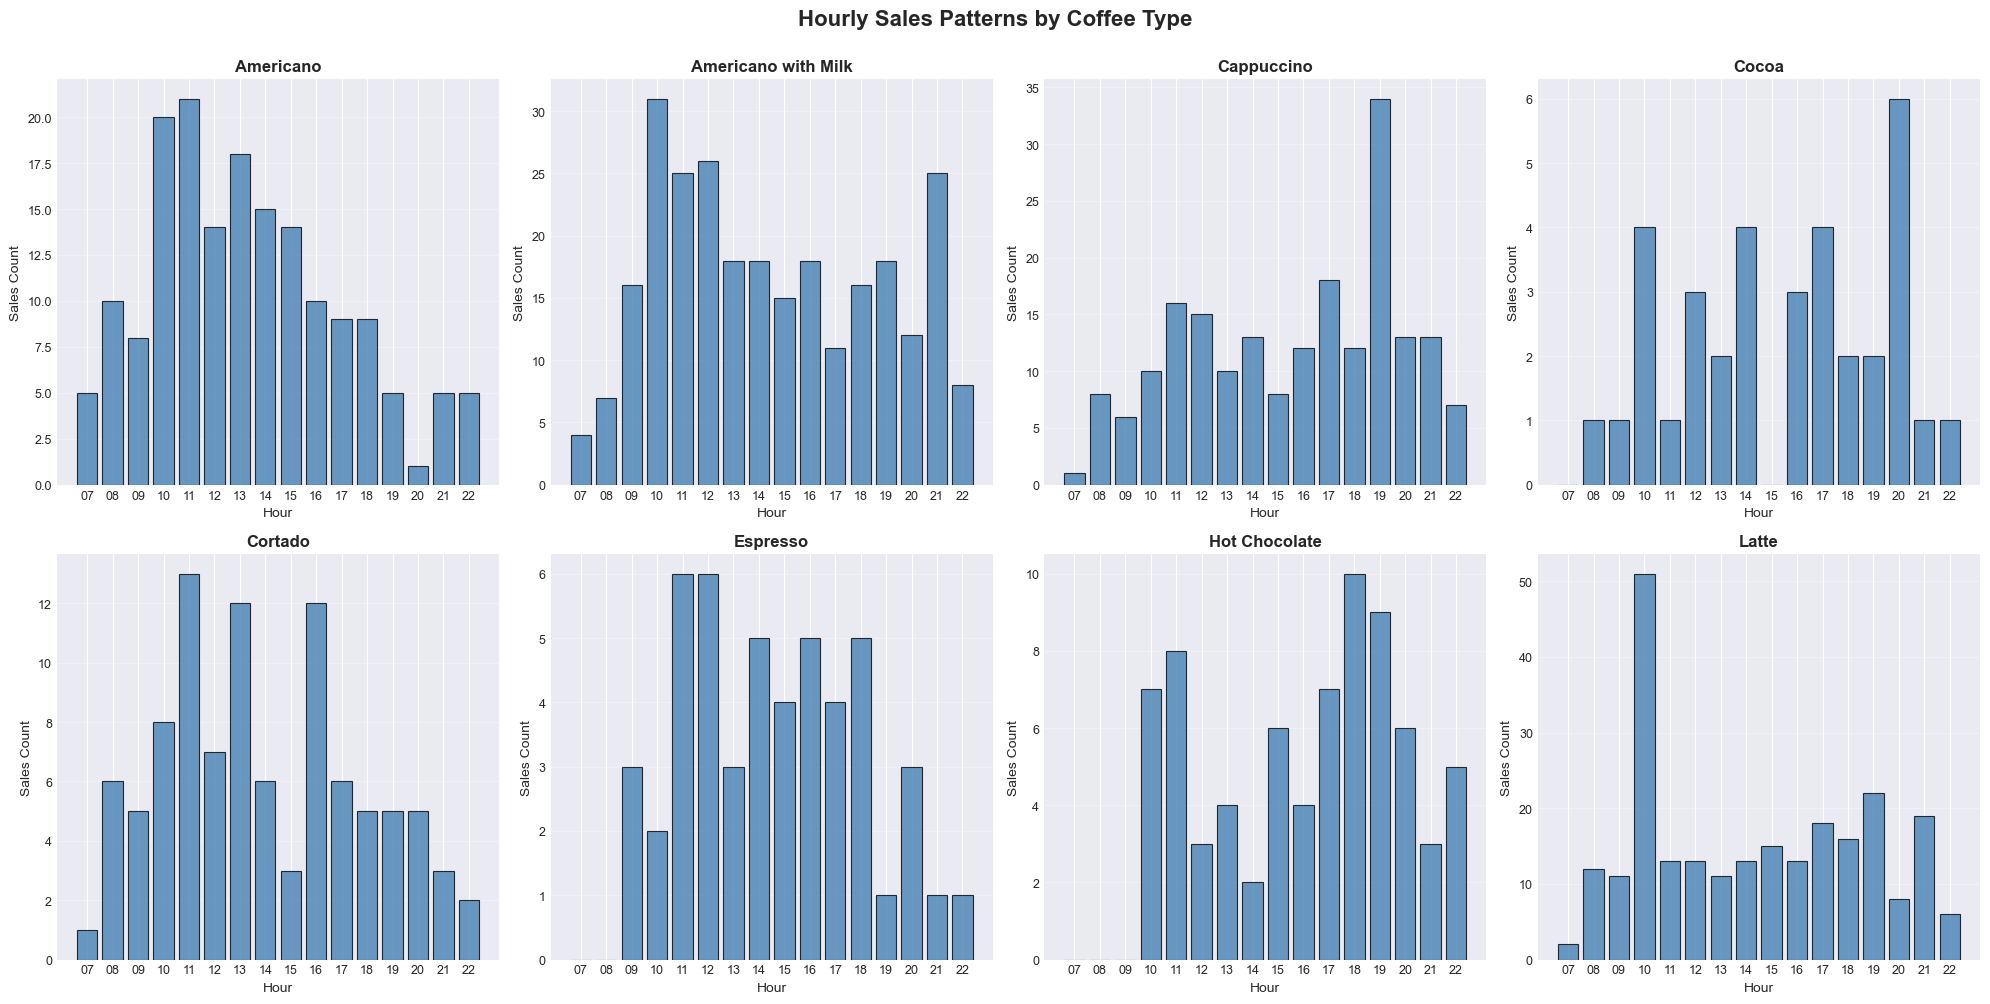

In [65]:
# Create subplots for each coffee type
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

for i, column in enumerate(hourly_sales_by_coffee.columns[1:]):
    axs[i].bar(
        hourly_sales_by_coffee['hour'],
        hourly_sales_by_coffee[column],
        color='steelblue',
        edgecolor='black',
        linewidth=0.8,
        alpha=0.8
    )
    axs[i].set_title(f'{column}', fontsize=12, fontweight='bold')
    axs[i].set_xlabel('Hour', fontsize=10)
    axs[i].set_ylabel('Sales Count', fontsize=10)
    axs[i].grid(axis='y', alpha=0.3)
    axs[i].tick_params(labelsize=9)

plt.suptitle('Hourly Sales Patterns by Coffee Type', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

##  Key Insights and Conclusions

### Main Findings:

1. **Payment Preferences:** Card payments dominate with over 92% of all transactions, indicating strong customer preference for cashless payments.

2. **Product Popularity:** Americano with Milk is the top-selling beverage, followed by Latte and Cappuccino.

3. **Temporal Patterns:**
   - **Peak Hours:** Morning hours (10-11 AM) show the highest sales volume
   - **Day Patterns:** Weekdays generally see more consistent traffic
   - **Monthly Trends:** Sales show growth patterns across the March-July period

4. **Revenue Insights:** Revenue distribution closely follows sales volume patterns, with top-selling items generating the most revenue.

### Recommendations:

- **Staffing:** Increase staff during peak hours (10-11 AM, 7 PM)
- **Inventory:** Prioritize stock for Americano with Milk, Latte, and Cappuccino
- **Promotions:** Consider targeted promotions for slower hours (7-9 AM, afternoon periods)
- **Payment Systems:** Ensure card payment systems are always operational given the high reliance


*Analysis completed on coffee shop sales data from March - July 2024*